In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal 
import scipy.fftpack
from pylab import *
from scipy import pi
import pylab
import cmath
import sys
import tensorflow as tf
#import lvm_read
print(tf.__version__)

import os
import pathlib

import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

2.5.0


In [2]:
commands = np.array(['DryRun', 'row0001', 'row005', 'row01', 'row1', 'row3'])

In [3]:
# get want using file path
from os import walk
from os.path import join

def data_path(mypath):
    filepath = []
    ae_path = []
    cu_path = []
    ae_path_container = []
    cu_path_container = []
    # 遞迴列出所有檔案的絕對路徑
    for root, dirs, files in walk(mypath):
        for f in files:
            if f.find("AEdate") >= 0: ae_path.append(f)
            elif f.find("Current") >= 0: cu_path.append(f)
#             elif f.find(".csv") >=0: equ_path = f
        ae_path.sort(key = lambda x: int(x[7:-4]))
        cu_path.sort(key = lambda x: int(x[8:-4]))
        for class_ in ae_path:
            files_path = os.path.join(root, class_)           
            ae_path_container.append(files_path)
        for class_ in cu_path:
            files_path = os.path.join(root, class_)           
            cu_path_container.append(files_path)
#         equ_path_container = equ_path
    return ae_path_container 

def data_path_c(mypath):
    filepath = []
    ae_path = []
    cu_path = []
    ae_path_container = []
    cu_path_container = []
    # 遞迴列出所有檔案的絕對路徑
    for root, dirs, files in walk(mypath):
        for f in files:
            if f.find("AEdate") >= 0: ae_path.append(f)
            elif f.find("Current") >= 0: cu_path.append(f)
#             elif f.find(".csv") >=0: equ_path = f
        ae_path.sort(key = lambda x: int(x[7:-4]))
        cu_path.sort(key = lambda x: int(x[8:-4]))
        for class_ in ae_path:
            files_path = os.path.join(root, class_)           
            ae_path_container.append(files_path)
        for class_ in cu_path:
            files_path = os.path.join(root, class_)           
            cu_path_container.append(files_path)
#         equ_path_container = equ_path
    return cu_path_container

In [4]:
# read data path
# dryrun_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190313_1113_DryRun/DryRun/"
# dryrun_1_data = data_path(dryrun_1_path)
# dryrun_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_fan/DryRun/"
# dryrun_2_data = data_path(dryrun_2_path)
# dryrun_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_wheel/DryRun/"
# dryrun_3_data = data_path(dryrun_3_path)

row0001_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1602_row0001_feed200um_1_har1/row0001/"
row0001_1_data = data_path(row0001_1_path)
row0001_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1630_row0001_feed200um_2_har1/row0001/"
row0001_2_data = data_path(row0001_2_path)
row0001_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1720_row0001_feed200um_3_har1/row0001/"
row0001_3_data = data_path(row0001_3_path)

# row005_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181203_1404_row005_feed300um_1_nor1/row005/"
# row005_1_data = data_path(row005_1_path)
row005_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181204_0900_row005_feed300um_2_nor1/row005/"
row005_2_data = data_path(row005_2_path)
row005_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181207_1550_row005_feed100um_3_nor1/row005/"
row005_3_data = data_path(row005_3_path)

row01_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01/"
row01_1_data = data_path(row01_1_path)
row01_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0310_row01_feed200um_2_sof3/row01/"
row01_2_data = data_path(row01_2_path)
row01_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0350_row01_feed150um_3_sof3/row01/"
row01_3_data = data_path(row01_3_path)

row1_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1010_row1_feed200um_1_sof2/row1/"
row1_1_data = data_path(row1_1_path)
row1_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1102_row1_feed200um_2_sof2/row1/"
row1_2_data = data_path(row1_2_path)
row1_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1145_row1_feed200um_3_sof2/row1/"
row1_3_data = data_path(row1_3_path)

row3_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1355_row3_feed200um_1_sof1/row3/"
row3_1_data = data_path(row3_1_path)
row3_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1430_row3_feed200um_2_sof1/row3/"
row3_2_data = data_path(row3_2_path)
row3_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1510_row3_feed200um_3_sof1/row3/"
row3_3_data = data_path(row3_3_path)

# print('dryrun_1_data :',shape(dryrun_1_data))
# print('dryrun_2_data :',shape(dryrun_2_data))
# print('dryrun_3_data :',shape(dryrun_3_data))

# read data path
# dryrun_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20190313_1113_DryRun/DryRun_c/"
# dryrun_1_data = data_path(dryrun_1_path)
# dryrun_2_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_fan/DryRun_c/"
# dryrun_2_data = data_path(dryrun_2_path)
# dryrun_3_path = "/media/a00439/2C167E66167E30C6/AEdata/20200213_DryRun_water_on_wheel/DryRun_c/"
# dryrun_3_data = data_path(dryrun_3_path)

row0001_1_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1602_row0001_feed200um_1_har1/row0001_c/"
row0001_1_data_c = data_path_c(row0001_1_path_c)
row0001_2_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1630_row0001_feed200um_2_har1/row0001_c/"
row0001_2_data_c = data_path_c(row0001_2_path_c)
row0001_3_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1720_row0001_feed200um_3_har1/row0001_c/"
row0001_3_data_c = data_path_c(row0001_3_path_c)

# row005_1_path = "/media/a00439/2C167E66167E30C6/AEdata/20181203_1404_row005_feed300um_1_nor1/row005_c/"
# row005_1_data = data_path(row005_1_path)
row005_2_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181204_0900_row005_feed300um_2_nor1/row005_c/"
row005_2_data_c = data_path_c(row005_2_path_c)
row005_3_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181207_1550_row005_feed100um_3_nor1/row005_c/"
row005_3_data_c = data_path_c(row005_3_path_c)

row01_1_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01_c/"
row01_1_data_c = data_path_c(row01_1_path_c)
row01_2_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0310_row01_feed200um_2_sof3/row01_c/"
row01_2_data_c = data_path_c(row01_2_path_c)
row01_3_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181225_0350_row01_feed150um_3_sof3/row01_c/"
row01_3_data_c = data_path_c(row01_3_path_c)

row1_1_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1010_row1_feed200um_1_sof2/row1_c/"
row1_1_data_c = data_path_c(row1_1_path_c)
row1_2_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1102_row1_feed200um_2_sof2/row1_c/"
row1_2_data_c = data_path_c(row1_2_path_c)
row1_3_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20181227_1145_row1_feed200um_3_sof2/row1_c/"
row1_3_data_c = data_path_c(row1_3_path_c)

row3_1_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1355_row3_feed200um_1_sof1/row3_c/"
row3_1_data_c = data_path_c(row3_1_path_c)
row3_2_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1430_row3_feed200um_2_sof1/row3_c/"
row3_2_data_c = data_path_c(row3_2_path_c)
row3_3_path_c = "/media/a00439/2C167E66167E30C6/AEdata/20190104_1510_row3_feed200um_3_sof1/row3_c/"
row3_3_data_c = data_path_c(row3_3_path_c)


print('row0001_1_data : {}, {}'.format(shape(row0001_1_data),shape(row0001_1_data_c)))
print('row0001_2_data : {}, {}'.format(shape(row0001_2_data),shape(row0001_2_data_c)))
print('row0001_3_data : {}, {}'.format(shape(row0001_3_data),shape(row0001_3_data_c)))

# print('row005_1_data :',shape(row005_1_data))
print('row005_2_data : {}, {}'.format(shape(row005_2_data),shape(row005_2_data_c)))
print('row005_3_data : {}, {}'.format(shape(row005_3_data),shape(row005_3_data_c)))

print('row01_1_data : {}, {}'.format(shape(row01_1_data),shape(row01_1_data_c)))
print('row01_2_data : {}, {}'.format(shape(row01_2_data),shape(row01_1_data_c)))
print('row01_3_data : {}, {}'.format(shape(row01_3_data),shape(row01_1_data_c)))

print('row1_1_data : {}, {}'.format(shape(row1_1_data),shape(row01_1_data_c)))
print('row1_2_data : {}, {}'.format(shape(row1_2_data),shape(row01_1_data_c)))
print('row1_3_data : {}, {}'.format(shape(row1_3_data),shape(row01_1_data_c)))

print('row3_1_data : {}, {}'.format(shape(row3_1_data),shape(row01_1_data_c)))
print('row3_2_data : {}, {}'.format(shape(row3_2_data),shape(row01_1_data_c)))
print('row3_3_data : {}, {}'.format(shape(row3_3_data),shape(row01_1_data_c)))

row0001_1_data : (180,), (180,)
row0001_2_data : (174,), (174,)
row0001_3_data : (168,), (168,)
row005_2_data : (201,), (201,)
row005_3_data : (101,), (101,)
row01_1_data : (200,), (200,)
row01_2_data : (200,), (200,)
row01_3_data : (152,), (200,)
row1_1_data : (200,), (200,)
row1_2_data : (201,), (200,)
row1_3_data : (200,), (200,)
row3_1_data : (202,), (200,)
row3_2_data : (200,), (200,)
row3_3_data : (201,), (200,)


In [5]:
# dryrun_all = np.hstack((dryrun_1_data, dryrun_2_data, dryrun_3_data))
row0001_all = np.hstack((row0001_1_data, row0001_2_data, row0001_3_data))
row005_all = np.hstack((row005_2_data, row005_3_data))
row01_all = np.hstack((row01_1_data, row01_2_data, row01_3_data))
row1_all = np.hstack((row1_1_data, row1_2_data, row1_3_data))
row3_all = np.hstack((row3_1_data, row3_2_data, row3_3_data))
# print('dryrun shape:  ',dryrun_all.shape)
row0001_all_c = np.hstack((row0001_1_data_c, row0001_2_data_c, row0001_3_data_c))
row005_all_c = np.hstack((row005_2_data_c, row005_3_data_c))
row01_all_c = np.hstack((row01_1_data_c, row01_2_data_c, row01_3_data_c))
row1_all_c = np.hstack((row1_1_data_c, row1_2_data_c, row1_3_data_c))
row3_all_c = np.hstack((row3_1_data_c, row3_2_data_c, row3_3_data_c))



print('row0001 shape:{},{}'.format(row0001_all.shape, row0001_all_c.shape))
print('row005 shape: {},{}'.format(row005_all.shape, row005_all_c.shape))
print('row01 shape:  {},{}'.format(row01_all.shape, row01_all_c.shape))
print('row1 shape:   {},{}'.format(row1_all.shape, row1_all_c.shape))
print('row3 shape:   {},{}'.format(row3_all.shape, row3_all_c.shape))
all_filepath_a = np.hstack((row0001_all, row005_all, row01_all, row1_all, row3_all))
all_filepath_c = np.hstack((row0001_all_c, row005_all_c, row01_all_c, row1_all_c, row3_all_c))
all_filepath =np.vstack((all_filepath_a, all_filepath_c))
print('all_filepath_a shape: {}'.format(all_filepath_a.shape))
print('all_filepath_c shape: {}'.format(all_filepath_c.shape))
print('all_filepath shape:   {}'.format((all_filepath.T).shape))

row0001 shape:(522,),(522,)
row005 shape: (302,),(302,)
row01 shape:  (552,),(552,)
row1 shape:   (601,),(601,)
row3 shape:   (603,),(603,)
all_filepath_a shape: (2580,)
all_filepath_c shape: (2580,)
all_filepath shape:   (2580, 2)


In [6]:
# def get_label(file):
#     class_name = []
#     for f in file:
#         if f.find("DryRun") >=0: class_name.append(0)
#         elif f.find("row0001") >=0: class_name.append(1)
#         elif f.find("row005") >=0: class_name.append(2)
#         elif f.find("row01") >=0: class_name.append(3)
#         elif f.find("row1") >=0: class_name.append(4)
#         elif f.find("row3") >=0: class_name.append(5)
#     return class_name

# all_filelabel = get_label(all_filepath)

In [7]:
filenames = tf.random.shuffle(all_filepath.T, seed=42)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Example file[0, 0] tensor: {}'.format(filenames[0]))

Number of total examples: 2580
Example file[0, 0] tensor: [b'/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01/AEdate_240.lvm'
 b'/media/a00439/2C167E66167E30C6/AEdata/20181225_0234_row01_feed200um_1_sof3/row01_c/Current_240.lvm']


In [8]:
train_files = filenames[:2064]
val_files = filenames[2064: 2064 + 258]
test_files = filenames[-258:]

print('Training set size   :', len(train_files))
print('Validation set size :', len(val_files))
print('Test set size       :', len(test_files))

Training set size   : 2064
Validation set size : 258
Test set size       : 258


### Reading AE files and their labels

In [9]:
def decode_ae(ae_binary):
    raw_data = tf.strings.split(ae_binary)[43:]
    raw_data = tf.strings.to_number(raw_data, out_type=tf.dtypes.float32, name=None )
    raw_data = raw_data - tf.math.reduce_mean(raw_data)
    return raw_data

def decode_vi(vi_binary):
    raw_data = tf.strings.split(vi_binary)[74:]
    raw_data = tf.reshape(raw_data, [-1, 5])
    raw_data1 = raw_data[:, -2]
    raw_data1 = tf.strings.to_number(raw_data1, out_type=tf.dtypes.float32, name=None )
    raw_data1 = raw_data1 - tf.math.reduce_mean(raw_data1)
    raw_data2 = raw_data[:, -1]
    raw_data2 = tf.strings.to_number(raw_data2, out_type=tf.dtypes.float32, name=None )
    raw_data2 = raw_data2 - tf.math.reduce_mean(raw_data2)
    return raw_data1, raw_data2

In [10]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)

  # Note: You'll use indexing here instead of tuple unpacking to enable this 
  # to work in a TensorFlow graph.
    return parts[-2]

In [11]:
def get_waveform_and_label(file_path):
    label = get_label(file_path[0])
    ae_audio_binary = tf.io.read_file(file_path[0])
    ae_waveform = decode_ae(ae_audio_binary)
    vi_audio_binary = tf.io.read_file(file_path[1])
    vi_waveform1, vi_waveform2 = decode_vi(vi_audio_binary)
    return ae_waveform, vi_waveform1, vi_waveform2, label

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)

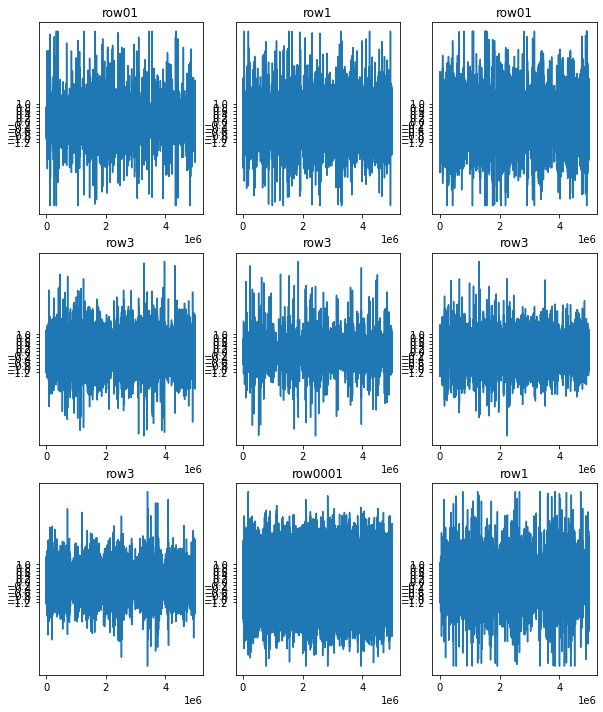

In [13]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (ae_audio, vi_audio1, vi_audio2, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(ae_audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode('utf-8')
    ax.set_title(label)

plt.show()

### Spectrogram

In [14]:
def get_spectrogram(waveform):

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
    waveform = tf.reshape(waveform, [5, -1])  # shape(5, 1000000)
#     print(waveform.shape)
#   spectrogram shape (t, f) -> ()

    spectrogram0 = tf.signal.stft(
            waveform[0], frame_length=1024,frame_step=512, fft_length=1024,
            window_fn=tf.signal.hann_window, pad_end=False, name=None)
    spectrogram0 = tf.expand_dims(spectrogram0, -1)
    spectrogram1 = tf.signal.stft(
            waveform[1], frame_length=1024,frame_step=512, fft_length=1024,
            window_fn=tf.signal.hann_window, pad_end=False, name=None)
    spectrogram1 = tf.expand_dims(spectrogram1, -1)
    spectrogram2 = tf.signal.stft(
            waveform[2], frame_length=1024,frame_step=512, fft_length=1024,
            window_fn=tf.signal.hann_window, pad_end=False, name=None)
    spectrogram2 = tf.expand_dims(spectrogram2, -1)
    spectrogram3 = tf.signal.stft(
            waveform[3], frame_length=1024,frame_step=512, fft_length=1024,
            window_fn=tf.signal.hann_window, pad_end=False, name=None)
    spectrogram3 = tf.expand_dims(spectrogram3, -1)
    spectrogram4 = tf.signal.stft(
            waveform[4], frame_length=1024,frame_step=512, fft_length=1024,
            window_fn=tf.signal.hann_window, pad_end=False, name=None)
    spectrogram4 = tf.expand_dims(spectrogram4, -1)
    
    spectrogram = tf.concat([spectrogram0, spectrogram1,spectrogram2,spectrogram3,spectrogram4], -1)
    
    
#     spectrogram = tf.stack([tf.signal.stft(
#             wf, frame_length=1024,frame_step=512, fft_length=1024,
#             window_fn=tf.signal.hann_window, pad_end=False, name=None)] for wf in waveform[:])
#     spectrogram = tf.expand_dims(spectrogram, -1)
    
    
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[:1024, :512, :]

    return spectrogram

def get_spectrogram_v(waveform):

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(
        waveform, frame_length=512,frame_step=256, fft_length=512,
        window_fn=tf.signal.hann_window, pad_end=False, name=None)

    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[:, :]

    return spectrogram

In [16]:
for ae_waveform, vi_waveform1, vi_waveform2, label in waveform_ds.take(1):
    label = label.numpy().decode('utf-8')
    spectrogram_ae = get_spectrogram(ae_waveform)
    spectrogram_vi1 = get_spectrogram_v(vi_waveform1)
    spectrogram_vi2 = get_spectrogram_v(vi_waveform2)
print('Label:', label)
print('Waveform 1 shape:', ae_waveform.shape)
print('Waveform 2 shape:', vi_waveform1.shape)
print('Waveform 3 shape:', vi_waveform2.shape)
print('Spectrogram ae shape:', spectrogram_ae.shape)
print('Spectrogram vi1 shape:', spectrogram_vi1.shape)
print('Spectrogram vi2 shape:', spectrogram_vi2.shape)

Label: row01
Waveform 1 shape: (5000000,)
Waveform 2 shape: (10000,)
Waveform 3 shape: (10000,)
Spectrogram ae shape: (1024, 512, 5)
Spectrogram vi1 shape: (38, 257)
Spectrogram vi2 shape: (38, 257)


/home/a00439/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


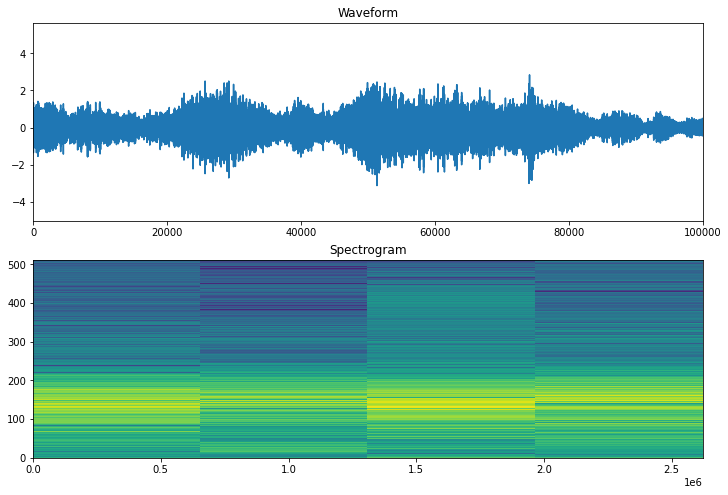

In [16]:
# def plot_spectrogram(spectrogram, ax):
#   # Convert to frequencies to log scale and transpose so that the time is
#   # represented in the x-axis (columns).
#     log_spec = np.log(spectrogram[0])
#     height = log_spec.shape[0]
#     width = log_spec.shape[1]
#     X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
#     Y = range(height)
#     ax.pcolormesh(X, Y, log_spec)


# fig, axes = plt.subplots(2, figsize=(12, 8))
# timescale = np.arange(waveform.shape[0])
# axes[0].plot(timescale, waveform.numpy())
# axes[0].set_title('Waveform')
# axes[0].set_xlim([0, 100000])
# plot_spectrogram(spectrogram.numpy(), axes[1])
# axes[1].set_title('Spectrogram')
# plt.show()

In [17]:
def get_spectrogram_and_label_id(ae_audio, vi_audio1, vi_audio2, label):
    spectrogram_ae = get_spectrogram(ae_audio)
    spectrogram_vi1 = get_spectrogram_v(vi_audio1)
    spectrogram_vi1 = tf.expand_dims(spectrogram_vi1, -1)
    spectrogram_vi2 = get_spectrogram_v(vi_audio2)
    spectrogram_vi2 = tf.expand_dims(spectrogram_vi2, -1)
    label_id = tf.argmax(label == commands)
    return (spectrogram_ae, spectrogram_vi1, spectrogram_vi2), label_id

In [18]:
spectrogram_ds = waveform_ds.map(
    get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)

In [128]:
# rows = 3
# cols = 3
# n = rows*cols
# fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
# for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
#     r = i // cols
#     c = i % cols
#     ax = axes[r][c]
#     plot_spectrogram(np.squeeze(spectrogram.numpy()), ax)
#     ax.set_title(commands[label_id.numpy()])
#     ax.axis('off')

# plt.show()

### Build and train the model

In [19]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)
    output_ds = output_ds.map(
        get_spectrogram_and_label_id,  num_parallel_calls=AUTOTUNE)
    return output_ds

In [20]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [21]:
batch_size = 8
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [22]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [23]:
for (ae_spectrogram, vi_spectrogram1, vi_spectrogram2), _ in spectrogram_ds.take(1):
    input_shape1 = ae_spectrogram.shape
    input_shape2 = vi_spectrogram1.shape
    input_shape3 = vi_spectrogram2.shape
print('Input 1 shape:', input_shape1)
print('Input 2 shape:', input_shape2)
print('Input 3 shape:', input_shape3)
num_labels = len(commands)
# norm_layer = preprocessing.Normalization()
# norm_layer.adapt(spectrogram_ds.map(lambda x, _: x))
# Saving and Loading Normalization Weights
# np.save("norm_weights.npy", norm_layer.get_weights())
# norm_layer.set_weights(np.load("norm_weights.npy",allow_pickle=True))

Input 1 shape: (1024, 512, 5)
Input 2 shape: (38, 257, 1)
Input 3 shape: (38, 257, 1)


In [49]:
# model = models.Sequential([
#     layers.Input(shape=input_shape),
#     preprocessing.Resizing(64, 64), 
#     norm_layer,
#     layers.Conv2D(16, 3, activation='relu'),
#     layers.Conv2D(32, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_labels),
# ])

from tensorflow import keras
# Input Layer
v1_input = keras.Input(shape=input_shape1, name='V1_Input')
v2_input = keras.Input(shape=input_shape2, name='V2_Input')
v3_input = keras.Input(shape=input_shape3, name='V3_Input')

# Hidden Layer
h1_0 = preprocessing.Resizing(128, 128)(v1_input)
h1_1 = layers.Conv2D(16,3,strides=1,activation='relu', name='hidden1_1')(h1_0)
h1_2 = layers.Conv2D(32,3,strides=1,activation='relu', name='hidden1_2')(h1_1)
h1_3 = layers.MaxPooling2D()(h1_2)
h1_4 = layers.Conv2D(32,3,strides=1,activation='relu', name='hidden1_3')(h1_3)
h1_5 = layers.MaxPooling2D()(h1_4)
h1_6 = layers.Dropout(0.25)(h1_5)
h1_7_ft = layers.Flatten()(h1_6)

h2_0 = preprocessing.Resizing(32, 64)(v2_input)
h2_1 = layers.Conv2D(16,3,strides=1,activation='relu', name='hidden2_1')(h2_0)
h2_2 = layers.Conv2D(32,3,strides=1,activation='relu', name='hidden2_2')(h2_1)
h2_3 = layers.MaxPooling2D()(h2_2)
h2_4 = layers.Dropout(0.25)(h2_3)
h2_5_ft = layers.Flatten()(h2_4)

h3_0 = preprocessing.Resizing(32, 64)(v3_input)
h3_1 = layers.Conv2D(16,3,strides=1,activation='relu', name='hidden3_1')(h3_0)
h3_2 = layers.Conv2D(32,3,strides=1,activation='relu', name='hidden3_2')(h3_1)
h3_3 = layers.MaxPooling2D()(h3_2)
h3_4 = layers.Dropout(0.25)(h3_3)
h3_5_ft = layers.Flatten()(h2_4)

concat = layers.Concatenate()([h1_7_ft, h2_5_ft, h3_5_ft])
h4_1 = layers.Dense(128, activation='relu', name='hidden4_1')(concat)
h4_2 = layers.Dense(64, activation='relu', name='hidden4_2')(h4_1)
h4_3 = layers.Dropout(0.5)(h4_2)

# Output Layer
outputs = layers.Dense(num_labels, name='Output')(h4_3)

# Create Model
model = keras.Model(inputs=[v1_input, v2_input, v3_input], outputs=outputs)



model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
V1_Input (InputLayer)           [(None, 1024, 512, 5 0                                            
__________________________________________________________________________________________________
resizing_26 (Resizing)          (None, 128, 128, 5)  0           V1_Input[0][0]                   
__________________________________________________________________________________________________
hidden1_1 (Conv2D)              (None, 126, 126, 16) 736         resizing_26[0][0]                
__________________________________________________________________________________________________
V2_Input (InputLayer)           [(None, 38, 257, 1)] 0                                            
____________________________________________________________________________________________

In [50]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [51]:
EPOCHS = 20
history = model.fit(
    train_ds, 
    validation_data=val_ds,  
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/20
258/258 [==============================] - 19s 73ms/step - loss: 1.3419 - accuracy: 0.6880 - val_loss: 0.0294 - val_accuracy: 0.9961
Epoch 2/20
258/258 [==============================] - 19s 73ms/step - loss: 0.1628 - accuracy: 0.9506 - val_loss: 0.0629 - val_accuracy: 0.9845
Epoch 3/20
258/258 [==============================] - 19s 73ms/step - loss: 0.0540 - accuracy: 0.9826 - val_loss: 0.0336 - val_accuracy: 0.9922
Epoch 00003: early stopping


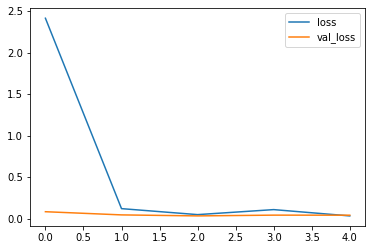

In [46]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

### Evaluate test set performance

In [52]:
test_audio1 = []
test_audio2 = []
test_audio3 = []
test_labels = []

for (audio1, audio2, audio3), label in test_ds:
    test_audio1.append(audio1.numpy())
    test_audio2.append(audio2.numpy())
    test_audio3.append(audio3.numpy())
    test_labels.append(label.numpy())

test_audio1 = np.array(test_audio1)
test_audio2 = np.array(test_audio2)
test_audio3 = np.array(test_audio3)
test_labels = np.array(test_labels)

In [55]:
y_pred = np.argmax(model.predict((test_audio1, test_audio2, test_audio3)), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 99%


### Display a confusion matrix

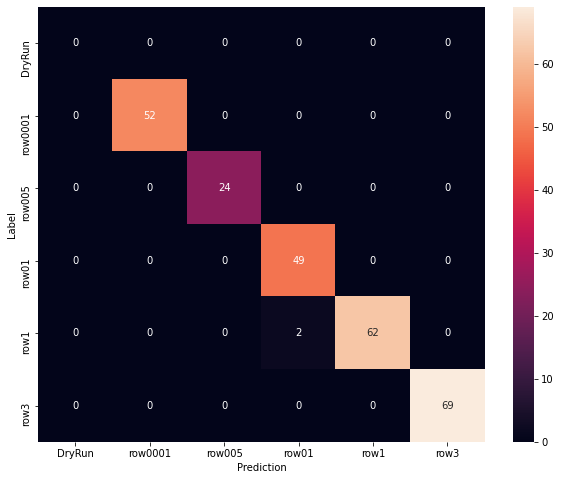

In [56]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

### Run inference on an audio file

In [57]:
sample_file = preprocess_dataset(['/media/a00439/2C167E66167E30C6/AEdata/20181225_0310_row01_feed200um_2_sof3/row01/AEdate_280.lvm'])

sample_ds = sample_file

for spectrogram, label in sample_ds.batch(1):
    prediction = model(spectrogram)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f'Predictions for "{commands[label[0]]}"')
    plt.show()

ValueError: in user code:

    <ipython-input-11-4cf1506fee82>:2 get_waveform_and_label  *
        label = get_label(file_path[0])
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1051 _slice_helper
        name=name)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1223 strided_slice
        shrink_axis_mask=shrink_axis_mask)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py:10537 strided_slice
        shrink_axis_mask=shrink_axis_mask, name=name)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/framework/func_graph.py:601 _create_op_internal
        compute_device)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:3565 _create_op_internal
        op_def=op_def)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:2042 __init__
        control_input_ops, op_def)
    /home/a00439/tf2/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Index out of range using input dim 0; input has only 0 dims for '{{node strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_STRING, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](args_0, strided_slice/stack, strided_slice/stack_1, strided_slice/stack_2)' with input shapes: [], [1], [1], [1] and with computed input tensors: input[3] = <1>.
